<div align="center" style="background-color: yellow;">
  <h1 style="color: blue;">BUSINESS CASE NETFLIX - DATA EXPLORATION & VISUALIZATION</h1>
</div>






Importing the dependencies

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Loading the dataset

In [4]:
df = pd.read_csv(r'/content/original_netflix.csv')

Basic Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.head(4)

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...

In [7]:
df.shape

(8807, 12)

In [8]:
df.nunique()                 #checking for unique values

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [9]:
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['release_year'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['release_year'], **{})
chart

**Un-nesting the columns except date_added**

In [10]:
# Split the 'cast' column by comma and unnest it
df['cast'] = df['cast'].str.split(', ')
df = df.explode('cast')

# Split the 'director' column by comma and unnest it
df['director'] = df['director'].str.split(', ')
df = df.explode('director')

# Split the 'country' column by comma and unnest it
df['country'] = df['country'].str.split(', ')
df = df.explode('country')


**Checking for null values and imputation**

In [11]:
df.isnull().sum()

show_id             0
type                0
title               0
director        21937
cast             1190
country          5421
date_added         69
release_year        0
rating             38
duration            3
listed_in           0
description         0
dtype: int64

**Data Insights**
*   show_id', 'type', 'title', 'release_year', 'listed_in', and 'description' columns have no missing values.
*   director' column has 21937 null values, indicating that the director information is missing for those entries.
*   'date_added' column has 69 null values, suggesting that the date when the title was added to Netflix is missing for those entries.
*  'cast' column has 1190 null values, indicating that the cast information is missing for those entries.
* 'country' column has 5421 null values, indicating that the country information is missing for those entries.
*  'rating' column has 38 null values, implying that the rating information is missing for those entries.
*'duration' column has 3 null values, indicating that the duration information is missing for those entries.





In [12]:
df['director'] = df['director'].fillna(0)
df['cast'] = df['cast'].fillna(0)
df['country'] = df['country'].fillna(0)
df['date_added'] = df['date_added'].fillna(0)
df['rating'] = df['rating'].fillna(0)
df['duration'] = df['duration'].fillna(0)

In [13]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Graphical & Non Graphical Analysis**

In [18]:
type_counts=df.type.value_counts()
type_counts

Movie      65346
TV Show    24036
Name: type, dtype: int64

Text(0.5, 1.0, 'Count vs Type of Shows')

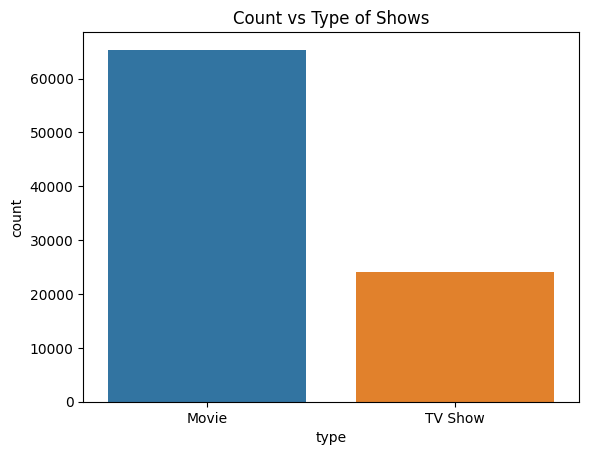

In [20]:
sns.countplot(x= 'type', data=df)
plt.title('Count vs Type of Shows')

In [19]:
rating_counts=df.rating.value_counts()
rating_counts

TV-MA       29860
TV-14       17437
R           12865
PG-13        7814
TV-PG        6356
PG           5182
TV-Y7        4073
TV-Y         2745
TV-G         1329
G             878
NR            676
NC-17          55
TV-Y7-FV       39
0              38
UR             32
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

<Figure size 1000x2000 with 0 Axes>

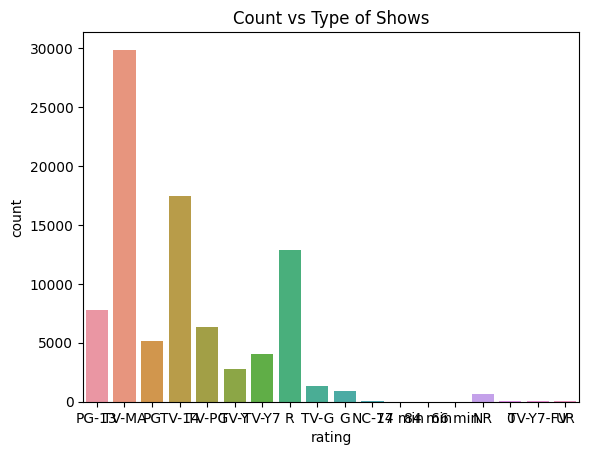

<Figure size 1000x2000 with 0 Axes>

In [32]:
sns.countplot(x= 'rating', data=df)
plt.title('Count vs Type of Shows')
plt.figure(figsize=(10,20))

**Contribution of Movies & TV Shows to Netflix**


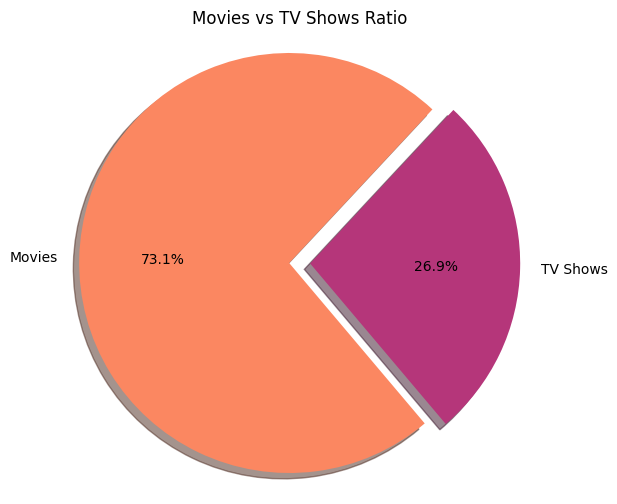

In [33]:
#pie chart showing tv and movie percentage
palette_color = sns.color_palette("magma_r", 3)
plt.figure(figsize=(6, 6))

plt.pie(
    df["type"].value_counts(),
    labels=["Movies", "TV Shows"],
    colors=palette_color,
    autopct='%.1f%%',
    explode=[0, 0.1],
    shadow=True,
    startangle=47
)

plt.title("Movies vs TV Shows Ratio")
plt.axis('equal')

plt.show()

The majority of the content in this dataset consists of movies, with 73.1%, while TV shows make up a smaller portion, with 26.9% .

**Top 10 Countries producing Movies and TV Shows**

In [34]:
# Filter the DataFrame for movies
movies_df = df[df['type'] == 'Movie']

# Group by 'country' and count unique 'title' values for movies
country_movie_counts = movies_df.groupby('country')['title'].nunique()

# Sort the counts in descending order and pick the top 10 countries for movies
top_10_movie_countries = country_movie_counts.sort_values(ascending=False).head(10)

print("Top 10 countries with the most movies:")
print(top_10_movie_countries)

# Filter the DataFrame for TV shows
tvshows_df = df[df['type'] == 'TV Show']

# Group by 'country' and count unique 'title' values for TV shows
country_tvshow_counts = tvshows_df.groupby('country')['title'].nunique()

# Sort the counts in descending order and pick the top 10 countries for TV shows
top_10_tvshow_countries = country_tvshow_counts.sort_values(ascending=False).head(10)

print("\nTop 10 countries with the most TV shows:")
print(top_10_tvshow_countries)

Top 10 countries with the most movies:
country
United States     2751
India              962
United Kingdom     532
0                  440
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Name: title, dtype: int64

Top 10 countries with the most TV shows:
country
United States     938
0                 391
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Name: title, dtype: int64


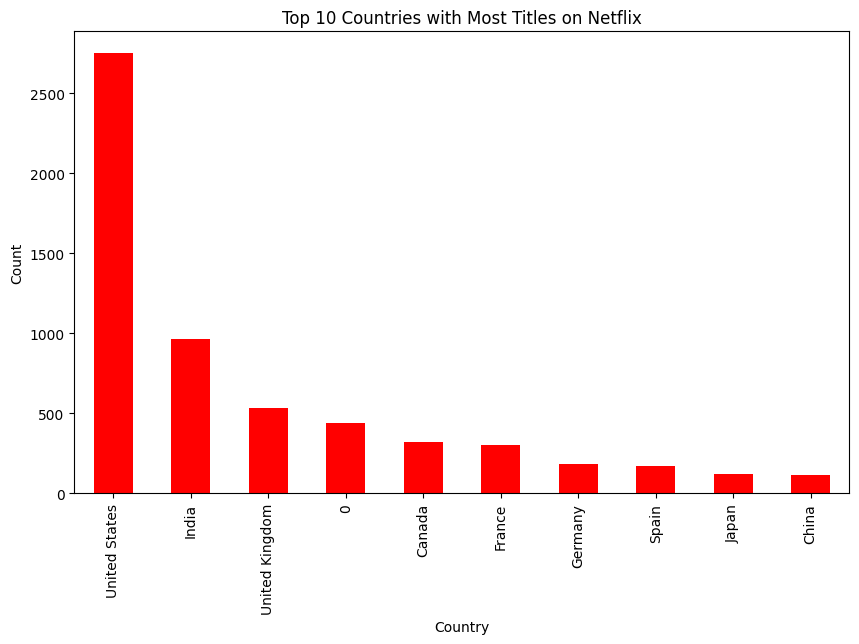

In [35]:
# Plot the graph
plt.figure(figsize=(10, 6))
top_10_movie_countries.plot(kind='bar',color='red')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with Most Titles on Netflix')
plt.show()

From the above analysis, It is evident that United State has produced the highest no.of both TV shows & Movies. Followed by, India in movies and United Kingdom in TV Shows. The plot above shows the Title (Movies & TV Shows) contribution by each country, United States leads there too.

**List of TV Shows & Movies added date wise**

In [44]:
# Converting "Date_Added" column to datatime object
df['date_added'] = df['date_added'].str.strip()
df["date_Added_dt"] = pd.to_datetime(df["date_added"], format="%B %d, %Y")

#First TV Shows to be added on Netflix
oldest_tv_shows = df.sort_values(by="date_added")


fig = go.Figure(data=[go.Table(header=dict(values=['TV Show', 'date_added'],fill_color='#FFA07A'),
                 cells=dict(values=[oldest_tv_shows['title'],oldest_tv_shows['date_added']],fill_color='#FFBBBB'))
                     ])
fig.show()

The above results shows the list of TV Shows added according to the date wise

In [51]:
#First Movies to be added on Netflix
oldest_movies = df.sort_values(by="date_added")


fig = go.Figure(data=[go.Table(header=dict(values=['Movie', 'date_added'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_movies['title'],oldest_movies['date_added']],fill_color='#80CED7'))
                     ])
fig.show()


The above results movies the list of TV Shows added according to the date wise



**Best time to launch a TV show**

In [53]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_Added_dt'], format='%Y-%m-%d')

# Extract the week and month from 'date_added' and create new columns
df['week_added'] = df['date_Added_dt'].dt.strftime('%Y-%U')
df['month_added'] = df['date_Added_dt'].dt.strftime('%Y-%m')

# Separate the DataFrame into TV shows and movies
tvshows_df = df[df['type'] == 'TV Show']
movies_df = df[df['type'] == 'Movie']

# Group by 'week_added' and count the total number of TV shows and movies in each week
tvshow_week_counts = tvshows_df.groupby('week_added').size()
movie_week_counts = movies_df.groupby('week_added').size()

# Find the best week to release TV shows and movies
best_tvshow_week = tvshow_week_counts.idxmax()
best_movie_week = movie_week_counts.idxmax()

# Group by 'month_added' and count the total number of TV shows and movies in each month
tvshow_month_counts = tvshows_df.groupby('month_added').size()
movie_month_counts = movies_df.groupby('month_added').size()

# Find the best month to release TV shows and movies
best_tvshow_month = tvshow_month_counts.idxmax()
best_movie_month = movie_month_counts.idxmax()

print("Best week to release TV shows:", best_tvshow_week)
print("Best week to release movies:", best_movie_week)

print("\nBest month to release TV shows:", best_tvshow_month)
print("Best month to release movies:", best_movie_month)


Best week to release TV shows: 2016-00
Best week to release movies: 2020-00

Best month to release TV shows: 2021-07
Best month to release movies: 2021-07


**Analysis on actors/directors of different types of shows/movies**

***1. Actors***



In [58]:
# Group by 'actor' and count unique 'title' values for movies and TV shows
actor_counts = df.groupby('cast')['title'].nunique()

# Sort the counts in descending order and pick the top 10 directors
top_10_actors = director_counts.sort_values(ascending=False).head(10)

print("Top 10 actors with the most movies/TV shows:")
print(top_10_actors)

Top 10 actors with the most movies/TV shows:
cast
0                   825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: title, dtype: int64


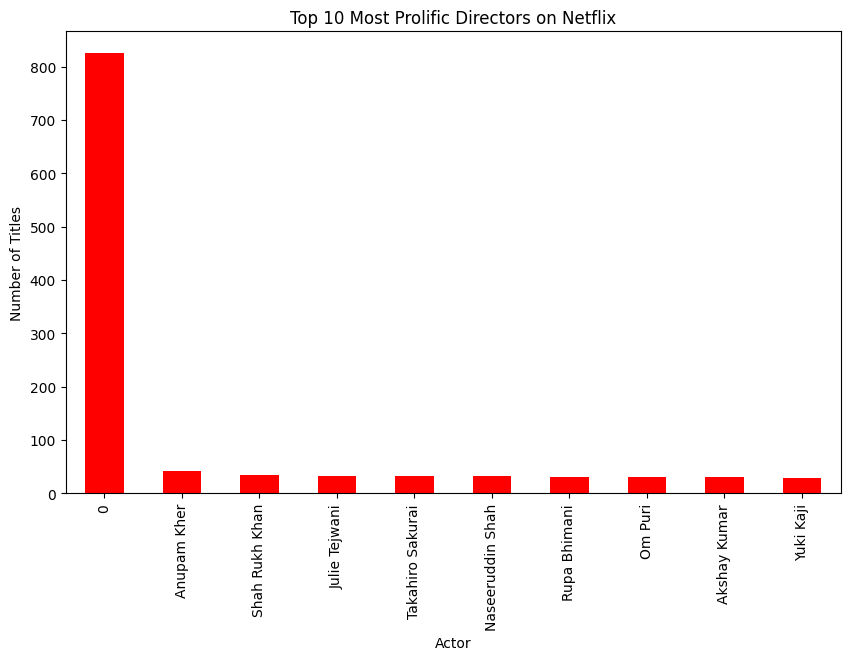

In [59]:
# Plot the graph
plt.figure(figsize=(10, 6))
top_10_actors.plot(kind='bar',color='red')
plt.xlabel('Actor')
plt.ylabel('Number of Titles')
plt.title('Top 10 Most Prolific Directors on Netflix')
plt.show()

The analysis highlights the top 10 most prolific actors on Netflix, with Anupam Kher & Shah Rukh Khan having the highest number of titles, followed by Julie Tejwani & Takahiro Sakurai. These actors have made a significant contribution to the Netflix content library.



***2. Directors***

In [60]:
# Group by 'director' and count unique 'title' values for movies and TV shows
director_counts = df.groupby('director')['title'].nunique()

# Sort the counts in descending order and pick the top 10 directors
top_10_directors = director_counts.sort_values(ascending=False).head(10)

print("Top 10 directors with the most movies/TV shows:")
print(top_10_directors)

Top 10 directors with the most movies/TV shows:
director
0                      2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Marcus Raboy             16
Suhas Kadav              16
Jay Karas                15
Cathy Garcia-Molina      13
Youssef Chahine          12
Jay Chapman              12
Name: title, dtype: int64


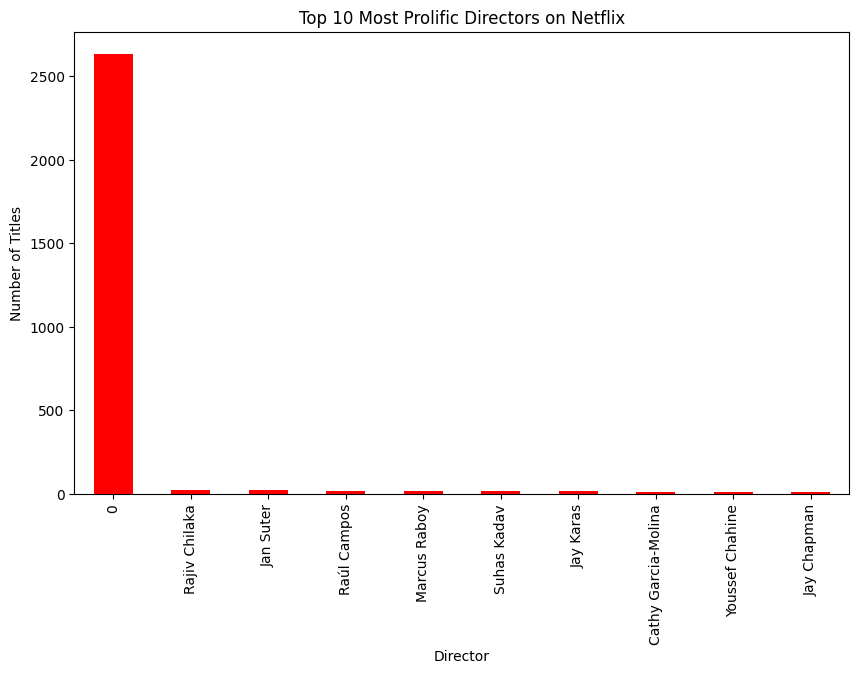

In [61]:
# Plot the graph
plt.figure(figsize=(10, 6))
top_10_directors.plot(kind='bar',color='red')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.title('Top 10 Most Prolific Directors on Netflix')
plt.show()

The analysis highlights the top 10 most prolific directors on Netflix, with Rajiv Chilaka and Jan Suter having the highest number of titles, followed by Raul Campos, Marcus Raboy. These directors have made a significant contribution to the Netflix content library.



### **The most produced and popular movie genre - using word cloud**

In [62]:
pip install wordcloud

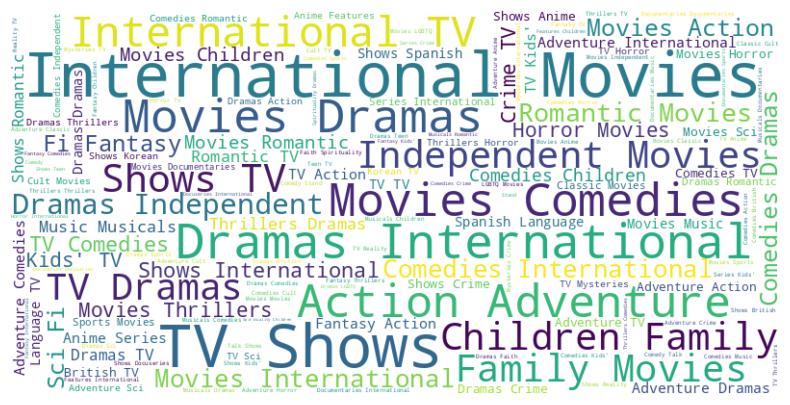

In [63]:
#Wordcloud for Movie Genres

from wordcloud import WordCloud
# Combine all genre strings into one long string
all_genres = ' '.join(df['listed_in'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Popular Genre on Netflix')

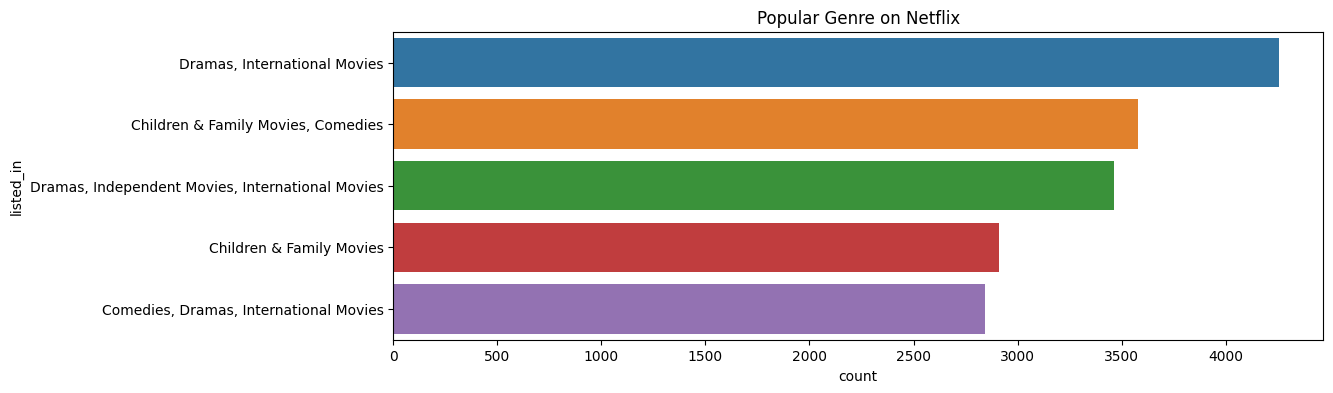

In [64]:
plt.figure(figsize=(12,4))
sns.countplot(y='listed_in',order=df['listed_in'].value_counts().index[0:5],data=df)
plt.title('Popular Genre on Netflix')

**After how many days the movie will be added to Netflix after the release of the movie**

In [66]:
movies_data = df[df['type'] == 'Movie']

# Calculate the difference between 'Date_added' and 'Release_year' columns
df['Days_to_Add'] = (df['date_added'] - pd.to_datetime(df['release_year'], format='%Y')).dt.days

# Find the mode (most common) of the 'Days_to_Add' column
mode_days_to_add = df['Days_to_Add'].mode().values[0]

# Print the result
print(f"The most common number of days to add a movie to Netflix after release is approximately {mode_days_to_add} days.")

The most common number of days to add a movie to Netflix after release is approximately 2289.0 days.


**Analysis by year**

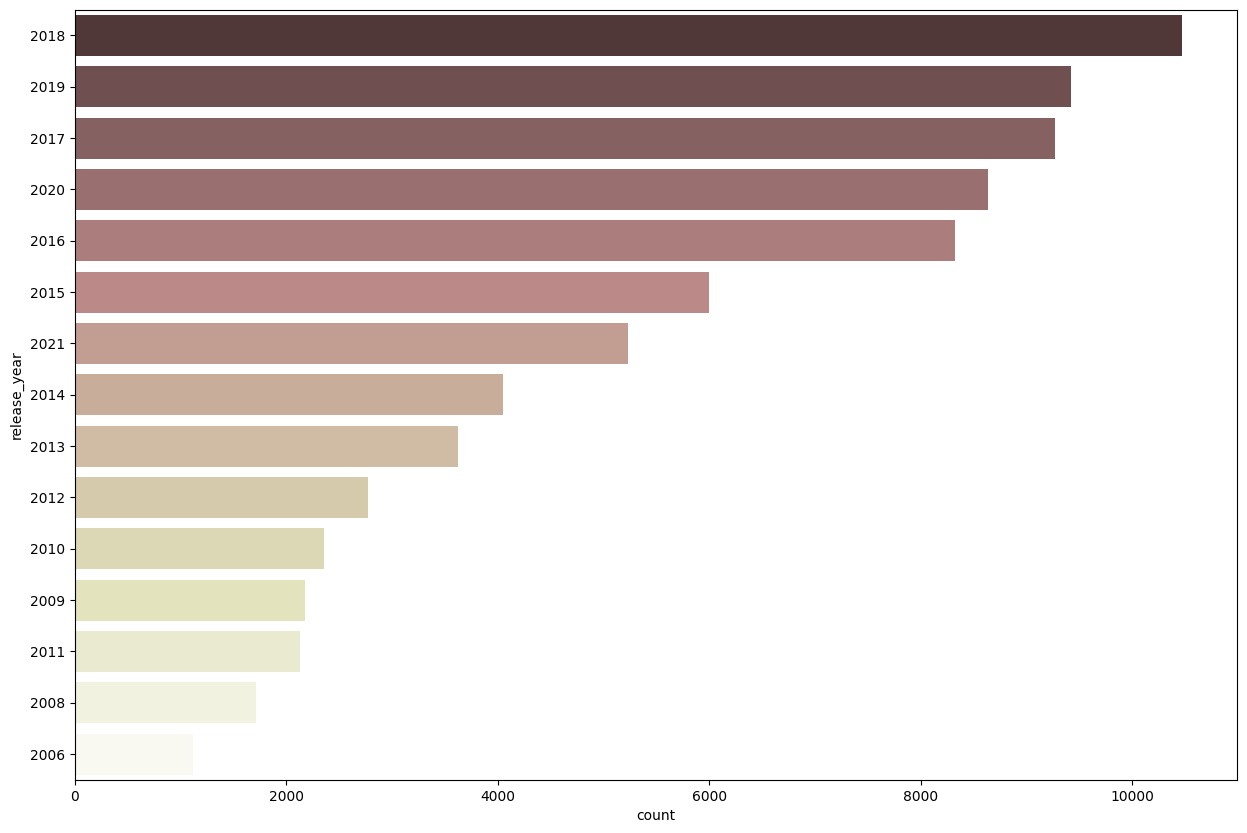

In [67]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, y='release_year',palette='pink', order=df['release_year'].value_counts().index[0:15])
plt.show()

Hence, 2018 marked the year with the highest volume of movie releases.

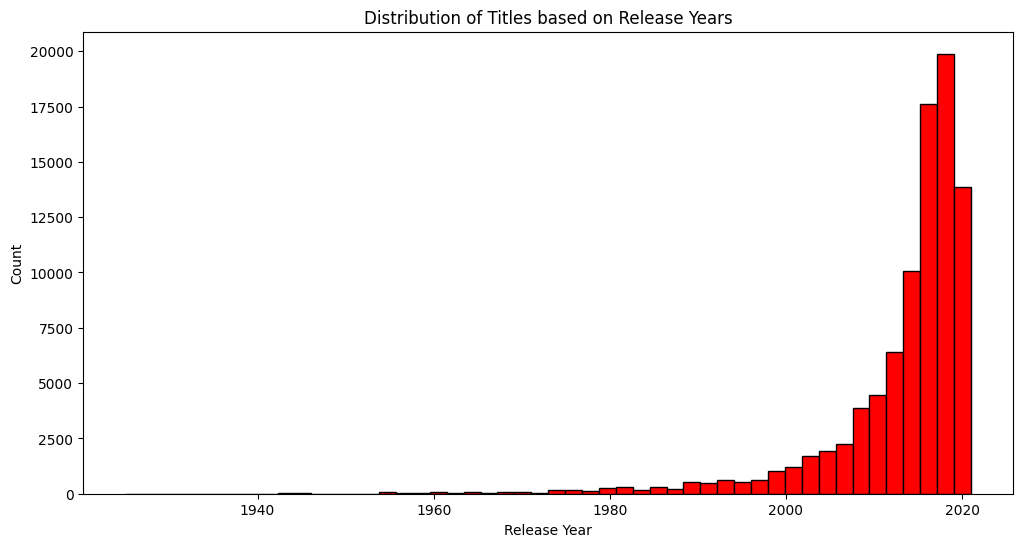

In [68]:
import matplotlib.pyplot as plt

# Plotting the distribution of titles based on release years
plt.figure(figsize=(12, 6))
plt.hist(df['release_year'], bins=50, edgecolor='black',color='red')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Titles based on Release Years')
plt.show()

In [69]:
top_years = df['release_year'].value_counts().head(10)
top_years

2018    10470
2019     9418
2017     9274
2020     8639
2016     8322
2015     5996
2021     5234
2014     4049
2013     3621
2012     2773
Name: release_year, dtype: int64

### SUMMARY

In the initial stage of data analysis, I focused on data preprocessing. This involved extracting information about the dataset's attributes, describing the data using statistical functions, and performing necessary data transformations. I un-nested columns with multiple values, checked for null values, and filled them with zeros for continuous variables.

In the second stage of analysis, both graphical and non-graphical techniques were employed. I began by creating a count plot to visualize the distribution of show types and ratings, providing insights into the total counts within each category. This analysis revealed that Netflix offers a greater variety of movies compared to TV shows.

Next, I examined the contribution of movies and TV shows to the Netflix platform, expressing their presence in terms of percentages. This analysis confirmed that movies constitute a larger portion of Netflix's content compared to TV shows.

I also identified the top 10 countries that have made significant contributions to Netflix's library, both in terms of TV shows and movies. This information sheds light on the global reach and diversity of content available on the platform.

Further analysis delved into the contributions of directors and actors. Identified the top 10 actors and directors who have made substantial contributions. Anupam Kher emerged as the top actor, while Rajiv Chilaka was the leading director.

To understand the most popular and beloved genres on Netflix, I used a word cloud, revealing that dramas and international movies are among the most produced and popular genres among viewers.

The analysis also included an examination of the average time Netflix takes to add a movie or TV show to its platform after its release, indicating that it typically takes around 2289 days.

Lastly, explored the distribution of movie releases over the years. The analysis highlighted that 2018 witnessed the highest volume of movie releases, with a count of 10,470, followed closely by 2019, with 9,418 releases. To visualize this distribution, we provided a distribution plot.

These analyses collectively offer insights into the content, contributors, and trends within the Netflix dataset, providing valuable information for understanding the platform's content landscape.